## DCS 640 Data Presentation & Visualization (DSC640-T302 2231-1)
## Bellevue University
## 6.2 Exercises: Histogram, Box Plot,  Bullet Chart, and Additional Chart
## Author: Jake Meyer
## Date: 02/25/2023

## Assignment Instructions:

Submit 1 histogram, 1 box plot, 1 bullet chart, and 1 additional chart of your choice with Python

In [2]:
'''
Import the necessary libraries to complete Exercise 2.2.
'''
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import plotly.express as px
from matplotlib import cm
%matplotlib inline

In [3]:
'''
Check the versions of the packages.
'''
print('numpy version:', np.__version__)
print('pandas version:', pd.__version__)
print('seaborn version:', sns.__version__)
print('matplotlib version:', matplotlib.__version__)

numpy version: 1.23.5
pandas version: 1.3.4
seaborn version: 0.11.2
matplotlib version: 3.4.3


## Dataset Understanding

In [4]:
'''
Import the datasets.
Note: A copy of the CSV file was placed into the same directory as this notebook.
Utilize pd.read_csv() to read the file as a pandas data frame.
'''
df1 = pd.read_csv('birth-rate.csv')
df2 = pd.read_csv('crimeratesbystate-formatted.csv')
df3 = pd.read_csv('education.csv')

In [5]:
'''
Use head() function to display the first 5 rows of data of df1.
'''
df1.head()

Country    1960    1961    1962    1963    1964    1965  \
0                 Aruba  36.400  35.179  33.863  32.459  30.994  29.513   
1           Afghanistan  52.201  52.206  52.208  52.204  52.192  52.168   
2                Angola  54.432  54.394  54.317  54.199  54.040  53.836   
3               Albania  40.886  40.312  39.604  38.792  37.913  37.008   
4  Netherlands Antilles  32.321  30.987  29.618  28.229  26.849  25.518   

     1966    1967    1968  ...    1999    2000    2001    2002    2003  \
0  28.069  26.721  25.518  ...  15.024  14.528  14.041  13.579  13.153   
1  52.130  52.076  52.006  ...  51.229  50.903  50.486  49.984  49.416   
2  53.585  53.296  52.984  ...  48.662  48.355  48.005  47.545  46.936   
3  36.112  35.245  34.421  ...  17.713  16.850  16.081  15.444  14.962   
4  24.280  23.173  22.230  ...  15.809  15.412  15.096  14.824  14.565   

     2004    2005    2006    2007    2008  
0  12.772  12.441  12.159  11.919  11.716  
1  48.803  48.177  47.575  47.023  46.538  
2  46.184  45.330  44.444  43.607  42.875  
3  14.644  14.485  14.464  14.534  14.649  
4  14.309  14.051  13.790  13.532  13.281  

[5 rows x 50 columns]

In [6]:
'''
Use head() function to display the first 5 rows of data of df2.
'''
df2.head()

state  murder  forcible_rape  robbery  aggravated_assault  \
0  United States      5.6           31.7    140.7               291.1   
1        Alabama      8.2           34.3    141.4               247.8   
2         Alaska      4.8           81.1     80.9               465.1   
3        Arizona      7.5           33.8    144.4               327.4   
4        Arkansas     6.7           42.9     91.1               386.8   

   burglary  larceny_theft  motor_vehicle_theft  
0     726.7         2286.3                416.7  
1     953.8         2650.0                288.3  
2     622.5         2599.1                391.0  
3     948.4         2965.2                924.4  
4    1084.6         2711.2                262.1

In [7]:
'''
Use head() function to display the first 5 rows of data of df3.
'''
df3.head()

state  reading  math  writing  percent_graduates_sat  \
0  United States      501   515      493                     46   
1        Alabama      557   552      549                      7   
2         Alaska      520   516      492                     46   
3        Arizona      516   521      497                     26   
4       Arkansas      572   572      556                      5   

   pupil_staff_ratio  dropout_rate  
0                7.9           4.4  
1                6.7           2.3  
2                7.9           7.3  
3               10.4           7.6  
4                6.8           4.6

In [8]:
'''
Understand the shape of the df1.
'''
print('There are {} rows and {} columns in the df1.'.format(df1.shape[0], df1.shape[1]))

There are 234 rows and 50 columns in the df1.


In [10]:
'''
Understand the shape of the df2.
'''
print('There are {} rows and {} columns in the df2.'.format(df2.shape[0], df2.shape[1]))

There are 52 rows and 8 columns in the df2.


In [11]:
'''
Understand the shape of the df2.
'''
print('There are {} rows and {} columns in the df3.'.format(df3.shape[0], df3.shape[1]))

There are 52 rows and 7 columns in the df3.


In [12]:
'''
Find the type of data within each df1 column initially.
'''
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 50 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  234 non-null    object 
 1   1960     211 non-null    float64
 2   1961     164 non-null    float64
 3   1962     184 non-null    float64
 4   1963     164 non-null    float64
 5   1964     164 non-null    float64
 6   1965     211 non-null    float64
 7   1966     165 non-null    float64
 8   1967     183 non-null    float64
 9   1968     164 non-null    float64
 10  1969     164 non-null    float64
 11  1970     212 non-null    float64
 12  1971     165 non-null    float64
 13  1972     183 non-null    float64
 14  1973     166 non-null    float64
 15  1974     169 non-null    float64
 16  1975     210 non-null    float64
 17  1976     172 non-null    float64
 18  1977     187 non-null    float64
 19  1978     173 non-null    float64
 20  1979     175 non-null    float64
 21  1980     216 non

In [13]:
'''
Find the type of data within each df2 column initially.
'''
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   state                52 non-null     object 
 1   murder               52 non-null     float64
 2   forcible_rape        52 non-null     float64
 3   robbery              52 non-null     float64
 4   aggravated_assault   52 non-null     float64
 5   burglary             52 non-null     float64
 6   larceny_theft        52 non-null     float64
 7   motor_vehicle_theft  52 non-null     float64
dtypes: float64(7), object(1)
memory usage: 3.4+ KB


In [14]:
'''
Find the type of data within each df3 column initially.
'''
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   state                  52 non-null     object 
 1   reading                52 non-null     int64  
 2   math                   52 non-null     int64  
 3   writing                52 non-null     int64  
 4   percent_graduates_sat  52 non-null     int64  
 5   pupil_staff_ratio      52 non-null     float64
 6   dropout_rate           52 non-null     float64
dtypes: float64(2), int64(4), object(1)
memory usage: 3.0+ KB


In [15]:
'''
Understand if there are any missing values in df1.
'''
df1.isna().sum().sort_values(ascending = False)

1961       70
1963       70
1964       70
1968       70
1969       70
1966       69
1971       69
1973       68
1974       65
1976       62
1978       61
1979       59
1972       51
1967       51
1962       50
1977       47
1986       29
1984       28
1983       27
1981       26
1988       26
1975       24
1989       24
1965       23
1960       23
1970       22
1993       21
1991       19
1980       18
1994       18
1999       18
1998       17
2003       17
2004       17
1982       17
2001       16
1996       16
2008       15
1985       15
1987       14
1997       13
1995       12
1990       12
2007       12
1992       11
2000       11
2002       11
2005       11
2006       11
Country     0
dtype: int64

In [39]:
df1.dropna(inplace=True)

In [40]:
'''
Understand if there are any missing values in df1.
'''
df1.isna().sum().sort_values(ascending = False)

Country    0
1996       0
1986       0
1987       0
1988       0
1989       0
1990       0
1991       0
1992       0
1993       0
1994       0
1995       0
1997       0
1960       0
1998       0
1999       0
2000       0
2001       0
2002       0
2003       0
2004       0
2005       0
2006       0
2007       0
1985       0
1984       0
1983       0
1982       0
1961       0
1962       0
1963       0
1964       0
1965       0
1966       0
1967       0
1968       0
1969       0
1970       0
1971       0
1972       0
1973       0
1974       0
1975       0
1976       0
1977       0
1978       0
1979       0
1980       0
1981       0
2008       0
dtype: int64

In [17]:
'''
Understand if there are any missing values in df2.
'''
df2.isna().sum().sort_values(ascending = False)

state                  0
murder                 0
forcible_rape          0
robbery                0
aggravated_assault     0
burglary               0
larceny_theft          0
motor_vehicle_theft    0
dtype: int64

In [18]:
'''
Understand if there are any missing values in df3.
'''
df3.isna().sum().sort_values(ascending = False)

state                    0
reading                  0
math                     0
writing                  0
percent_graduates_sat    0
pupil_staff_ratio        0
dropout_rate             0
dtype: int64

## Chart Creation from the Datasets. 

### Histogram

Text(0.5, 1.0, 'U.S. State Writing Scores')

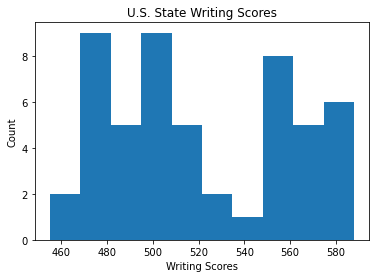

In [25]:
'''
Create a histogram using matplotlib plt.hist().
'''
plt.hist(df3['writing'])
plt.xlabel('Writing Scores')
plt.ylabel('Count')
plt.title('U.S. State Writing Scores')

C:\Users\jkmey\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'U.S. State Writing Scores')

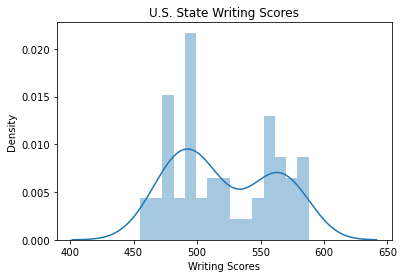

In [29]:
'''
Create a histogram with Seaborn distplot()
'''
sns.distplot(df3['writing'], bins = 15)
plt.xlabel('Writing Scores')
plt.ylabel('Density')
plt.title('U.S. State Writing Scores')

### Box Plot

In [45]:
'''
Revised df4 from education dataset for reading, writing, and math scores.
'''
df4 = pd.read_csv('education_revised.csv')

Text(0.5, 1.0, 'U.S. Math, Reading, and Writing Scores')

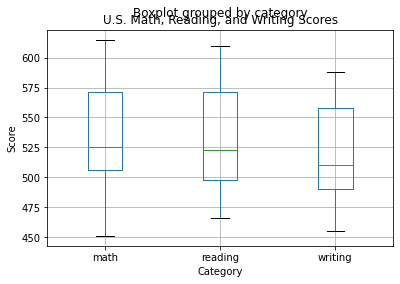

In [52]:
df4.boxplot(column = 'score', by = 'category')
plt.xlabel('Category')
plt.ylabel('Score')
plt.title('U.S. Math, Reading, and Writing Scores')

Text(0.5, 1.0, 'U.S. Math, Reading, and Writing Scores')

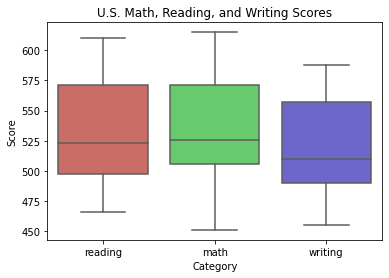

In [53]:
sns.boxplot(x = 'category', y = 'score', data = df4, palette = 'hls')
plt.xlabel('Category')
plt.ylabel('Score')
plt.title('U.S. Math, Reading, and Writing Scores')

### Bullet Chart

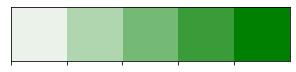

In [54]:
sns.palplot(sns.light_palette("green", 5))

In [55]:
'''
Function pulled from pbpython.com/bullet-graph.html.
'''
def bulletgraph(data=None, limits=None, labels=None, axis_label=None, title=None,
                size=(5, 3), palette=None, formatter=None, target_color="gray",
                bar_color="black", label_color="gray"):
    """ Build out a bullet graph image
        Args:
            data = List of labels, measures and targets
            limits = list of range valules
            labels = list of descriptions of the limit ranges
            axis_label = string describing x axis
            title = string title of plot
            size = tuple for plot size
            palette = a seaborn palette
            formatter = matplotlib formatter object for x axis
            target_color = color string for the target line
            bar_color = color string for the small bar
            label_color = color string for the limit label text
        Returns:
            a matplotlib figure
    """
    # Determine the max value for adjusting the bar height
    # Dividing by 10 seems to work pretty well
    h = limits[-1] / 10

    # Use the green palette as a sensible default
    if palette is None:
        palette = sns.light_palette("green", len(limits), reverse=False)

    # Must be able to handle one or many data sets via multiple subplots
    if len(data) == 1:
        fig, ax = plt.subplots(figsize=size, sharex=True)
    else:
        fig, axarr = plt.subplots(len(data), figsize=size, sharex=True)

    # Add each bullet graph bar to a subplot
    for idx, item in enumerate(data):

        # Get the axis from the array of axes returned when the plot is created
        if len(data) > 1:
            ax = axarr[idx]

        # Formatting to get rid of extra marking clutter
        ax.set_aspect('equal')
        ax.set_yticklabels([item[0]])
        ax.set_yticks([1])
        ax.spines['bottom'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_visible(False)

        prev_limit = 0
        for idx2, lim in enumerate(limits):
            # Draw the bar
            ax.barh([1], lim - prev_limit, left=prev_limit, height=h,
                    color=palette[idx2])
            prev_limit = lim
        rects = ax.patches
        # The last item in the list is the value we're measuring
        # Draw the value we're measuring
        ax.barh([1], item[1], height=(h / 3), color=bar_color)

        # Need the ymin and max in order to make sure the target marker
        # fits
        ymin, ymax = ax.get_ylim()
        ax.vlines(
            item[2], ymin * .9, ymax * .9, linewidth=1.5, color=target_color)

    # Now make some labels
    if labels is not None:
        for rect, label in zip(rects, labels):
            height = rect.get_height()
            ax.text(
                rect.get_x() + rect.get_width() / 2,
                -height * .4,
                label,
                ha='center',
                va='bottom',
                color=label_color)
    if formatter:
        ax.xaxis.set_major_formatter(formatter)
    if axis_label:
        ax.set_xlabel(axis_label)
    if title:
        fig.suptitle(title, fontsize=14)
    fig.subplots_adjust(hspace=0)

In [65]:
'''
Create the data to plot from the education dataset.
'''
data_to_plot2 = [("Math", 541, 600),
                 ("Reading", 536, 590),
                 ("Writing", 523, 590)]

C:\Users\jkmey\AppData\Local\Temp/ipykernel_732/3132978703.py:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([item[0]])


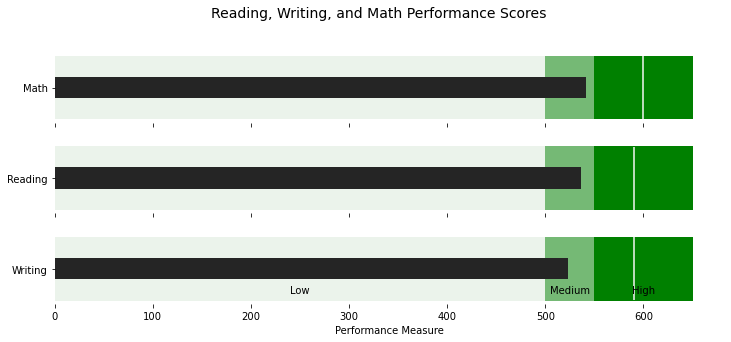

In [66]:
'''
Generate the bullet chart.
'''
bulletgraph(data_to_plot2, limits=[500, 550, 650],
            labels=["Low", "Medium", "High"], size=(12,5),
            axis_label="Performance Measure", label_color="black",
            bar_color="#252525", target_color='#f7f7f7',
            title="Reading, Writing, and Math Performance Scores")

### Additional Chart - Lollipop Plot

In [84]:
'''
Create the data for the lollipop plot.
'''
x = range(1,31)
values = np.random.uniform(size = 30)

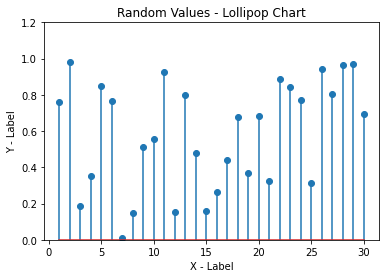

In [86]:
'''
Use the stem function from matplotlib.
'''
plt.stem(x, values)
plt.ylim(0, 1.2)
plt.xlabel('X - Label')
plt.ylabel('Y - Label')
plt.title('Random Values - Lollipop Chart')
plt.show()